# Pipeline the flow of Model 

In [1]:
## importing required modules
import tensorflow as tf
import keras 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading our models
model = keras.models.load_model("./model/model_mobile_net_2.h5")
haar = cv2.CascadeClassifier(r"C:\Users\nared\anaconda3\Lib\site-packages\cv2\data/haarcascade_frontalface_default.xml")

In [3]:
## define our pipeline function

def pipeline_model(path , video = False):
    #step - 1 : read image
    if video == True :
        img = path
        
    else : 
        img = cv2.imread(path)
    
    #step - 2 : crop face
    face = haar.detectMultiScale(img , 1.5 , 5)
    for x,y,h,w in face :
        roi = img[y:y+h , x:x+w]
   
       #step - 3 : Normalising
        img_norm = roi/255.
        
       #step - 4 : Resize image
        img_re = cv2.resize(img_norm , (224,224))
        
       # step - 5 : Reshape image in format [1,224,224,3]
        img_re = np.reshape(img_re,[1,224,224,3])
      
       # step - 6 : Pass to model
        results = model.predict(img_re)   ## if returns value < 0.5 it mean MALE and if > 0.5 then FEMALE
        
        if results[0][0] > 0.5 :
            predict = "Female"
            score = results[0][0]
            
        else :
            predict = "Male"
            score = 1 - results[0][0]    ## since it returns 2 d array and subtracting from 1 gives the atual score of predicting male
            
        # step - 7 
        text = "%s : %0.2f"%(predict , score)
        cv2.putText(img , text , (x,y) , cv2.FONT_HERSHEY_COMPLEX_SMALL , 1 , (0,255,0), 2 ) 
        cv2.rectangle(img ,(x,y) , (x+w , y+h), (0,255,0) , 2)
        
    return img

1/1 [==============================] - 6s 6s/step


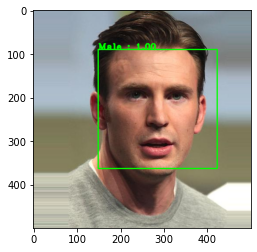

In [4]:
img = pipeline_model("./data/male_000281.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Applying Pipeline to video

In [ ]:
video = cv2.VideoCapture("./data/video.mp4")

while True :
    ret , frame = video.read()   #BGR
    
    if ret == False :
        break
        
    frame = pipeline_model(frame , video = True)
    cv2.imshow("Face&Gender Recognition" , frame)
    
    if cv2.waitKey(10) == ord("s"):  # press s to exit
        break
        
cv2.destroyAllWindows()
video.release()
    

In [30]:
video = cv2.VideoCapture(0)

while True :
    ret , frame = video.read()   #BGR
    
    if ret == False :
        break
        
    frame = pipeline_model(frame , video = True)
    cv2.imshow("Face&Gender Recognition" , frame)
    
    if cv2.waitKey(10) == ord("s"):  # press s to exit
        break
        
cv2.destroyAllWindows()
video.release()

1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 77ms/step
